Nesta atividade construiremos modelos preditivos de regressão em scikit learn para a predição dos votos de deputados federais considerando as últimas eleições. As atividades esperadas para essa etapa são descritas a seguir:

1. Baixe os dados aqui (veja descrição dos dados mais abaixo).

Vamos explorar dados sobre as votações que candidatos à Câmara Federal de Deputados receberam nos anos de 2006 e 2010. Esses dados foram extraídos do TSE (Links para um site externo)Links para um site externo, pré-processados e contemplam informações sobre aproximadamente 7.300 candidatos. A descrição de cada atributo é dada mais abaixo.

"sequencial_candidato" :(character) id do candidato

"nome": (character)

"uf": (character)

"partido": (character)

"quantidade_doacoes": (integer)

"quantidade_doadores": (integer) número de doadores diferentes

"total_receita": (double) soma em R$ das doações

"media_receita": (double) média das doações

"recursos_de_outros_candidatos/comites": (double) quantia em R$ das doações provenientes de outros candidatos ou comite partidário

"recursos_de_pessoas_fisicas": (double) quantia em R$ das doações provenientes de outros CPFs

"recursos_de_pessoas_juridicas": (double) quantia em R$ das doações provenientes de outros CNPJ

"recursos_proprios": (double) quantia em R$ das doações provenientes do próprio candidato

"recursos_de_partido_politico": (double) quantia em R$ das doações provenientes do partido político do candidato

"votos": (integer) variável alvo. Se refere ao número de votos na campanha de 2006 e 2010

"quantidade_despesas": (integer)

"quantidade_fornecedores": (integer) número de fornecedores/despesas diferentes

"total_despesa": (double) soma em R$ das despesas de campanha

"media_despesa": (double) média das despesas de campanha

"cargo": (character)

"Sexo": (character)

"grau": (character) grau de instrução do candidato

"estado_civil": (character)

"ocupacao": (character) ocupação do candidato


2. Considere o pipeline mostrado nesse [link](https://www.kaggle.com/apapiu/regularized-linear-models) para um site externo para construir seus modelos de regressão. Isso implica, dentre outras coisas:

    1. Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.
    2. Construir modelos de regressão com (ridge e lasso) e sem regularização.
    3. Considerar também modelos de regressão não paramétrica como K-NN.
    4. Considerar outros modelos ainda não vistos em sala de sua escolha (e.g. SVR, Regression Trees e Random Florests).
    5. Tunar os hiperâmetros para cada caso e retornar os rmses de validação cruzada para todos os modelos avaliados.
    6. Plotar os resíduos versus predições e analisar se esses plots representam bons indícios da adequabilidade dos modelos a esse problema.
    
3. Alguns dias antes da entrega final serão liberados os dados de teste referentes à 2014 para validação final dos seus melhores modelos.
    1. Dica: Uma coisa que você pode fazer é usar os dados de 2006 como treino e os de 2010 como validação. Uma vez encontrados os melhores modelos para 2010 junte 2006+2010, retreine, e aplique o modelo aos dados de 2014 que serão liberados.
    
4. Responder:
    1. Dentre os modelos avaliados, qual foi o que deu o melhor resultado nos dados de 2014 em termos de RMSE? Justifique bem sua resposta.

A entrega deve ser um notebook Jupyter com código python e texto explicativo quando necessário. Crie um repositório na sua conta do github e envie o link do html do notebook.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoLarsCV
from sklearn.model_selection import cross_val_score

## A. Análise dos dados 

### Leitura dos dados

In [47]:
data = pd.read_csv("dados/eleicoes_2006_a_2010.csv")
df_data = pd.DataFrame(data) # load the dataset as a pandas data frame

In [48]:
df_data.head(10)

ano  sequencial_candidato                             nome  uf partido  \
0  2006                 10001      JOSÉ LUIZ NOGUEIRA DE SOUSA  AP      PT   
1  2006                 10002                LOIVA DE OLIVEIRA  RO      PT   
2  2006                 10002  MARIA DALVA DE SOUZA FIGUEIREDO  AP      PT   
3  2006                 10002                   ROMALDO MILANI  MS   PRONA   
4  2006                 10003           ANSELMO DE JESUS ABREU  RO      PT   
5  2006                 10003   JOSÉ RODRIGUES DOS SANTOS NETO  PI     PCO   
6  2006                 10003              JOSÉ TOMAZ DA SILVA  MS   PRONA   
7  2006                 10003         LUIZ CARLOS MUNHOZ MEIRA  MG     PPS   
8  2006                 10004              EDILSON VEIRA ROCHA  AP      PT   
9  2006                 10004    EDUARDO VALVERDE ARAÚJO ALVES  RO      PT   

   quantidade_doacoes  quantidade_doadores  total_receita  media_receita  \
0                   6                    6       16600.00    2766.666667   
1                  13                   13       22826.00    1755.846154   
2                  17                   16      148120.80    9257.550000   
3                   6                    6        3001.12     500.186667   
4                  48                   48            NaN            NaN   
5                   6                    6        1771.21     295.201667   
6                  14                    7         697.00      99.571429   
7                   2                    2       70000.00   35000.000000   
8                   2                    2        6065.00    3032.500000   
9                  68                   65      105813.20    1627.895385   

   recursos_de_outros_candidatos/comites  ...    quantidade_despesas  \
0                                    NaN  ...                     14   
1                                 6625.0  ...                     24   
2                                 2250.0  ...                    123   
3                                    NaN  ...                      8   
4                                    NaN  ...                    133   
5                                    NaN  ...                      9   
6                                    NaN  ...                     17   
7                                    NaN  ...                    332   
8                                 6065.0  ...                     10   
9                                 9575.0  ...                     68   

   quantidade_fornecedores  total_despesa  media_despesa             cargo  \
0                       14       16583.60    1184.542857  DEPUTADO FEDERAL   
1                       23       20325.99     883.738696  DEPUTADO FEDERAL   
2                      108      146011.70    1351.960185  DEPUTADO FEDERAL   
3                        8        3001.12     375.140000  DEPUTADO FEDERAL   
4                      120      116416.64     970.138667  DEPUTADO FEDERAL   
5                        9        1771.21     196.801111  DEPUTADO FEDERAL   
6                       10         696.91      69.691000  DEPUTADO FEDERAL   
7                      278       66016.95     237.471043  DEPUTADO FEDERAL   
8                       10        6060.42     606.042000  DEPUTADO FEDERAL   
9                       67      110818.20    1654.002985  DEPUTADO FEDERAL   

        sexo                         grau estado_civil  \
0  MASCULINO        ENSINO MÉDIO COMPLETO    CASADO(A)   
1   FEMININO            SUPERIOR COMPLETO  SOLTEIRO(A)   
2   FEMININO            SUPERIOR COMPLETO     VIÚVO(A)   
3  MASCULINO      ENSINO MÉDIO INCOMPLETO    CASADO(A)   
4  MASCULINO  ENSINO FUNDAMENTAL COMPLETO    CASADO(A)   
5  MASCULINO            SUPERIOR COMPLETO    CASADO(A)   
6  MASCULINO            SUPERIOR COMPLETO    CASADO(A)   
7  MASCULINO            SUPERIOR COMPLETO    CASADO(A)   
8  MASCULINO        ENSINO MÉDIO COMPLETO    CASADO(A)   
9  MASCULINO            SUPERIOR COMPLETO    CASADO(A)   

                 

### Pré-processamento dos dados

- Transformação das features numéricas enviesadas usando log(feature + 1) - isto tornará as features normais;
- Substituição dos valores numéricos ausentes (NaN's) pela média de suas respectivas colunas;
- Transformação das variáveis categóricas.

#### Enviesamento de features numéricas

Através dos histogramas abaixo vemos que as variáveis analisadas precisam de normalização, porque a distribuição dos seus valores não está igual.

In [49]:
# function to plot a histogram of each variable
def plot_histogram(feature):
    # log (feature + 1) because feature with values 0
    feature = pd.DataFrame({"1. " + feature: df_data[feature], "2. log(" + feature + ")": np.log1p(df_data[feature])})
    feature.hist() # TODO check how to increase the number of bins

# function to transform skewed variables using log(feature + 1)
def transform_skewed_var(feature):
    df_data[feature] = np.log1p(df_data[feature])

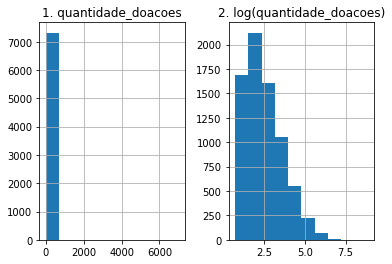

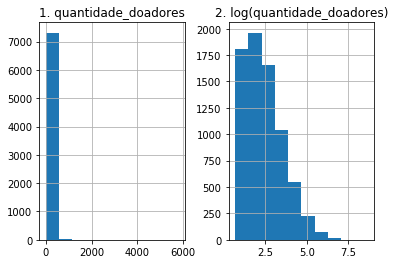

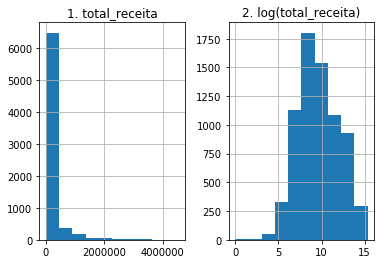

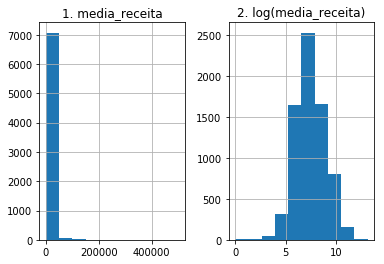

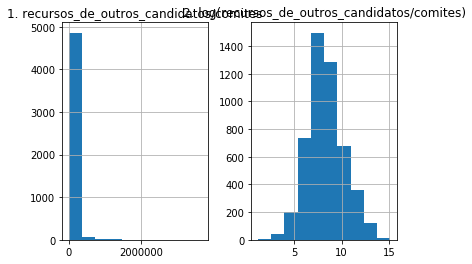

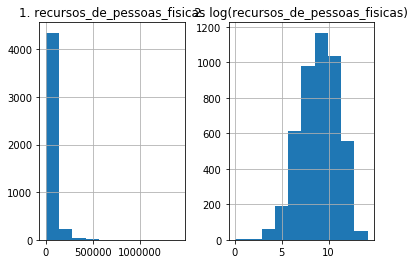

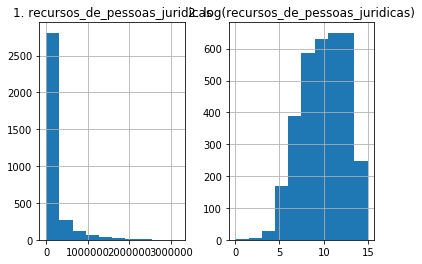

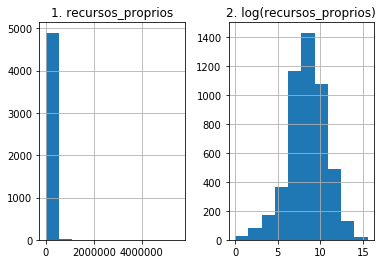

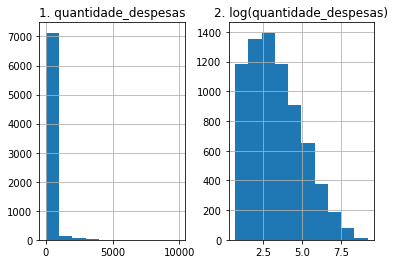

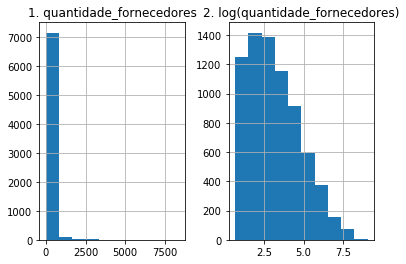

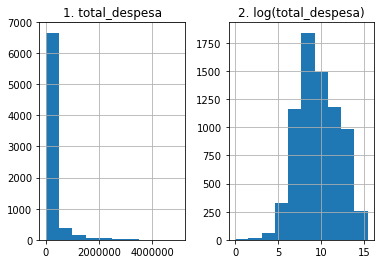

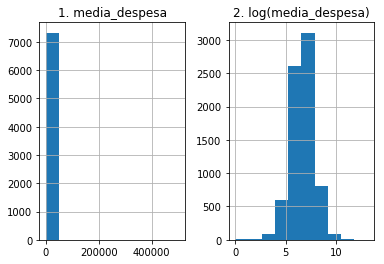

In [50]:
columns = "quantidade_doacoes quantidade_doadores total_receita media_receita recursos_de_outros_candidatos/comites recursos_de_pessoas_fisicas recursos_de_pessoas_juridicas recursos_proprios quantidade_despesas quantidade_fornecedores total_despesa media_despesa".split()

for feature in columns:
    plot_histogram(feature)
    transform_skewed_var(feature)    

#### Features com valores numéricos ausentes (NaN) 

Abaixo veremos quais as variáveis com valores ausentes (NaN).

In [51]:
df_data.isnull().any()

ano                                      False
sequencial_candidato                     False
nome                                     False
uf                                       False
partido                                  False
quantidade_doacoes                       False
quantidade_doadores                      False
total_receita                             True
media_receita                             True
recursos_de_outros_candidatos/comites     True
recursos_de_pessoas_fisicas               True
recursos_de_pessoas_juridicas             True
recursos_proprios                         True
quantidade_despesas                      False
quantidade_fornecedores                  False
total_despesa                            False
media_despesa                            False
cargo                                    False
sexo                                     False
grau                                     False
estado_civil                             False
ocupacao     

As variáveis **recursos_de_outros_candidatos/comites**, **recursos_de_pessoas_fisicas**, **recursos_de_pessoas_juridicas** e **recursos_proprios** são as que possuem valores ausentes e, portanto, serão substituídos pela média dos valores da respectiva variável. 

In [52]:
#filling NA's with the mean of the column:
df_data = df_data.fillna(df_data.mean())

df_data.isnull().any()

ano                                      False
sequencial_candidato                     False
nome                                     False
uf                                       False
partido                                  False
quantidade_doacoes                       False
quantidade_doadores                      False
total_receita                            False
media_receita                            False
recursos_de_outros_candidatos/comites    False
recursos_de_pessoas_fisicas              False
recursos_de_pessoas_juridicas            False
recursos_proprios                        False
quantidade_despesas                      False
quantidade_fornecedores                  False
total_despesa                            False
media_despesa                            False
cargo                                    False
sexo                                     False
grau                                     False
estado_civil                             False
ocupacao     

#### Tranformação das variáveis categóricas

As variáveis categóricas presentes nos dados, como **ocupação** e **estado_civil**, serão transformadas em variáveis numéricas, a fim de permitir a sua utilização nos modelos de regressão logo a seguir.

In [53]:
df_data = pd.get_dummies(df_data)

df_data.head(10)

ano  sequencial_candidato  quantidade_doacoes  quantidade_doadores  \
0  2006                 10001            1.945910             1.945910   
1  2006                 10002            2.639057             2.639057   
2  2006                 10002            2.890372             2.833213   
3  2006                 10002            1.945910             1.945910   
4  2006                 10003            3.891820             3.891820   
5  2006                 10003            1.945910             1.945910   
6  2006                 10003            2.708050             2.079442   
7  2006                 10003            1.098612             1.098612   
8  2006                 10004            1.098612             1.098612   
9  2006                 10004            4.234107             4.189655   

   total_receita  media_receita  recursos_de_outros_candidatos/comites  \
0       9.717218       7.925760                               8.324939   
1      10.035699       7.471276                               8.798757   
2      11.905790       9.133303                               7.719130   
3       8.007074       6.216979                               8.324939   
4       9.634619       7.466020                               8.324939   
5       7.479983       5.691041                               8.324939   
6       6.548219       4.610868                               8.324939   
7      11.156265      10.463132                               8.324939   
8       8.710455       8.017472                               8.710455   
9      11.569440       7.395657                               9.167015   

   recursos_de_pessoas_fisicas  recursos_de_pessoas_juridicas  \
0                     9.105091                       8.748464   
1                     9.615872                       6.908755   
2                    10.438547                      11.038461   
3                     7.048386                       7.004991   
4                    10.837206                      10.011960   
5                     8.984406                      10.011960   
6                     7.116394                      10.011960   
7                     8.984406                      10.011960   
8                     8.984406                      10.011960   
9                    10.987734                      10.165890   

   recursos_proprios          ...           \
0           7.170888          ...            
1           5.308268          ...            
2          10.993748          ...            
3           6.621406          ...            
4          11.141035          ...            
5           7.479983          ...            
6           8.431020          ...            
7          11.156265          ...            
8           8.431020          ...            
9           9.711176          ...            

   ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      
5                                                  0                      
6                                                  0                      
7                                                  0                      
8                                                  0                      
9                                                  0                      

   ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
5                        

### Divisão dos dados em treinamento e validação

Abaixo, o conjunto de dados utilizado será particionado em treino, para servir para a criação dos modelos de regressão e em validação, que será usado para avaliar a qualidade do modelo.

In [54]:
# create training and validation vars
y = df_data.votos
X_train, X_validation, y_train, y_validation = train_test_split(df_data, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

((5864, 7038), (5864,))
((1466, 7038), (1466,))


## B. Modelos de regressão sem regularização

### Implementando o modelo de regressão Ridge

In [55]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

/home/veruska/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
print(model_ridge.coef_)
print(model_ridge.score(X_validation, y_validation))

[ 7.60758800e-07  2.54658516e-11  1.32854803e-05 ... -4.93128862e-10
 -2.38022600e-08 -1.34065755e-09]
0.9999999969214555


### Implementando o modelo de regressão Lasso

In [59]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
print(model_lasso.coef_)
print(model_lasso.score(X_validation, y_validation))

[-0.00000000e+00  7.35950971e-18 -0.00000000e+00 ... -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
1.0


## B. Modelos de regressão não parámetrica

Implementando o modelo de regressão kNN